**Dependências:**
- conda install graphviz
- conda install pillow
- conda install -c conda-forge pydotplus

*Em caso de erro*: 
- *pip install graphviz*
- *adicionar a pasta "C:\Users\Arnaldo\Miniconda3\Library\bin\graphviz" ao path das variáveis de ambiente*

# Introdução

**Árvores de Decisão** são um dos algoritmos de Machine Learning mais fáceis de implementar. A ideia principla é dividir o problema em sub-problemas mais simples até que se resolva o problema. Nas árvores, cada **nó de decisão** contém um teste em um atributo, cada **folha** representa uma classe ou um valor (no caso da regressão) e o percurso da raiz até uma folha representa uma **regra de classificação/regressão**. Um atributo pode aparecer mais de uma vez na árvore, porém com valores diferentes. 

As **condições de paradas** podem ser inúmeras:
- Os atributos acabaram (no caso em que os atributos não se repetem na árvore)
- Todos os exemplos são de uma mesma classe
- A altura da árvore atingiu um valor previamente definido
- O número de exemplos a serem divididos é menor que um valor definido

**Vantagens:**
- Fáceis de entender e explicar. Mais fácil inclusive que regressão linear
- Algumas pessoas acreditam que ás arvores de decisão representam a tomada de decisão mais próxima dos seres humanos.
- Podem ser mostradas graficamente e facilmente interpretadas por não-especialistas
- Trabalha tanto com variáveis qualitativas e quantitativas sem precisar de pré-processamento

**Desvantagens:**
- A precisão não é tão boa quanto outros algoritmos
- Não são robustas. Uma pequena mudança nos dados pode causar uma grande diferença na árvore final.

**Algoritmo básico:**
1. Escolher um atributo
2. Dividir o (sub-)banco por uma valor específico do atributo
3. Para cada folha:
    
    3.1: Se todos os exemplos são da mesma classe, associar essa classe aos exemplos
    
    3.2: Caso contrário, repetir os passos 1 a 3

**Exemplo**:

Suponha que temos uma lista de visitantes a um site. Nosso **atributo alvo** é saber se eles assinaram algum de nossos servicos (valores possíveis são {Não, Básico ou Premium}). Para predizer o comportamento de uma maneira transparente, vamos utilizar **Árvores de Decisão**.

Nossos dados são listados abaixo:

In [1]:
data = [['Sol'    , 85, 85, 'Não', 'Não'],
        ['Sol'    , 80, 90, 'Sim', 'Não'],
        ['Nublado', 83, 86, 'Não', 'Sim'],
        ['Chuva'  , 70, 96, 'Não', 'Sim'],
        ['Chuva'  , 68, 80, 'Não', 'Sim'],
        ['Chuva'  , 65, 70, 'Sim', 'Não'],
        ['Nublado', 64, 65, 'Sim', 'Sim'],
        ['Sol'    , 72, 95, 'Não', 'Não'],
        ['Sol'    , 69, 70, 'Não', 'Sim'],
        ['Chuva'  , 75, 80, 'Não', 'Sim'],
        ['Sol'    , 75, 70, 'Sim', 'Sim'],
        ['Nublado', 72, 90, 'Sim', 'Sim'],
        ['Nublado', 81, 75, 'Não', 'Sim'],
        ['Chuva'  , 71, 91, 'Sim', 'Não'],
       ];

In [2]:
def divideset(data, column, value):
    '''Divide o dataset por uma coluna especifica. Funciona para valores numericos ou nominais'''
    split_function=None
    if isinstance(value, int) or isinstance(value, float):
        split_function = lambda row:row[column] >= value
    else:
        split_function = lambda row:row[column] == value
        
    set1 = [row for row in data if split_function(row)]
    set2 = [row for row in data if not split_function(row)]
    return (set1, set2)

In [3]:
divideset(data, 1, 70)

([['Sol', 85, 85, 'Não', 'Não'],
  ['Sol', 80, 90, 'Sim', 'Não'],
  ['Nublado', 83, 86, 'Não', 'Sim'],
  ['Chuva', 70, 96, 'Não', 'Sim'],
  ['Sol', 72, 95, 'Não', 'Não'],
  ['Chuva', 75, 80, 'Não', 'Sim'],
  ['Sol', 75, 70, 'Sim', 'Sim'],
  ['Nublado', 72, 90, 'Sim', 'Sim'],
  ['Nublado', 81, 75, 'Não', 'Sim'],
  ['Chuva', 71, 91, 'Sim', 'Não']],
 [['Chuva', 68, 80, 'Não', 'Sim'],
  ['Chuva', 65, 70, 'Sim', 'Não'],
  ['Nublado', 64, 65, 'Sim', 'Sim'],
  ['Sol', 69, 70, 'Não', 'Sim']])

In [4]:
def uniquecounts(data):
    '''Calcula o histograma das classes'''
    values = [row[len(row)-1] for row in data]
    return {v:values.count(v) for v in set(values)}

In [5]:
print(uniquecounts(data))

{'Sim': 9, 'Não': 5}


In [6]:
print(divideset(data, 0, 'Sol'))
print(uniquecounts(divideset(data, 0, 'Sol')[0]))

([['Sol', 85, 85, 'Não', 'Não'], ['Sol', 80, 90, 'Sim', 'Não'], ['Sol', 72, 95, 'Não', 'Não'], ['Sol', 69, 70, 'Não', 'Sim'], ['Sol', 75, 70, 'Sim', 'Sim']], [['Nublado', 83, 86, 'Não', 'Sim'], ['Chuva', 70, 96, 'Não', 'Sim'], ['Chuva', 68, 80, 'Não', 'Sim'], ['Chuva', 65, 70, 'Sim', 'Não'], ['Nublado', 64, 65, 'Sim', 'Sim'], ['Chuva', 75, 80, 'Não', 'Sim'], ['Nublado', 72, 90, 'Sim', 'Sim'], ['Nublado', 81, 75, 'Não', 'Sim'], ['Chuva', 71, 91, 'Sim', 'Não']])
{'Sim': 2, 'Não': 3}


# Entropia 

*Como escolher o melhor atributo?* Existem muitas medidas e algoritmos diferentes:
-  **ID3 e C4.5**: utilizam *ganho da informação*.
- **CART**: utiliza *impureza de Gini*.
- **CHAID**: utilizam significância estatística.

Em geral, todas as abordagens concordam em dois pontos:
- Uma divisão que mantém as proporções das classes é inútil
- Uma divisão onde todos os exemplos são da mesma classe, tem utilidade máxima

Nesse notebook vamos implementar o algoritmo **ID3** que utiliza a **entropia** para medir o ganho de informação. A **entropia** caracteriza a impureza de uma coleção arbitrária de exemplos.

Seja $S$ uma amostra de exemplos e $p_i$ a probabilidade de cada classe $i$. A entropia $E(S)$ é definida como:

$$E(S) = \sum_i^n{p_i\ln{p_i}}$$

o **Ganho de Informação**, então, 

<img src='http://www.patricklamle.com/Tutorials/Decision%20tree%20python/entropy.jpg'>

In [7]:
def entropy(data):
    from math import log
    log2 = lambda x:log(x)/log(2)
    results = uniquecounts(data)
    
    ent = 0.0
    n_samples = len(data)
    for r in results.keys():
        p = float(results[r])/n_samples
        ent = ent -p*log2(p)
    return ent

In [8]:
set1,set2 = divideset(data, 0, 'Sol')
entropy(set1), entropy(set2)

(0.9709505944546686, 0.7642045065086203)

In [9]:
entropy(data)

0.9402859586706309

# Árvores de Decisão 

- Para saber quão bom um atributo é, o algoritmo primeiramente calcula a entropia do grupo inteiro
- Então, ele tenta dividir o gupo pelos valores possíveis de cada atributo e calcula a entropia dos dois novos grupos. Para determinar qual atributo é melhor, o ganho de informação é calculado. O **ganho de informação** é a diferença entre a entropia atual e a entropia ponderada dos dois novos grupos. Intuitivamente, o **ganho de informação (GI) representa a divisão que reduz a entropia / obtém grupos mais homogêneos em comparação com o grupo antes da divisão**. Comparando o GI para várias divisões baseadas nas regras de divisão diferente nos permite escolher a "melhor" divisão.
- O algoritmo calcula o ganho de informação para **todo atributo e escolhe o com maior ganho de informação**.
- Fazemos isso recursivamente...

In [10]:
class DecisionNode:
    def __init__(self, col=-1, value=None, results=None, tb=None, fb=None):
        self.col = col          # indice da coluna do criterio a ser testado
        self.value = value      # valor que deve satisfazer para conseguir um resultado verdadeiro
        self.results = results  # armazena um dicionario dos resultado para esse ramo. None se o nó de decisão for folha.
        self.tb = tb            # proximos nó na arvore se o resultado é true
        self.fb = fb            # proximos nó na arvore se o resultado é false

In [11]:
def buildtree(data, scoref=entropy):
    if len(data)==0: return DecisionNode()
    current_score = scoref(data)
    
    best_gain, best_criteria, best_sets = 0.0, None, None
    
    column_count = len(data[0])-1 # -1 por que a coluna de labels nao conta
    
    for col in range(0, column_count):
        column_values = [row[col] for row in data]
        
        for value in column_values:
            (set1, set2) = divideset(data, col, value)
            
            p = float(len(set1))/len(data)
            gain = current_score -p*scoref(set1) -(1-p)*scoref(set2)
            if gain > best_gain and len(set1) > 0 and len(set2) > 0:
                best_gain = gain
                best_criteria = (col, value)
                best_sets = (set1,set2)
    
    if best_gain > 0:
        true_branch = buildtree(best_sets[0])
        false_branch = buildtree(best_sets[1])
        return DecisionNode(col=best_criteria[0], value=best_criteria[1], tb=true_branch, fb=false_branch)
    else:
        return DecisionNode(results=uniquecounts(data))

In [12]:
tree = buildtree(data)

In [13]:
print(tree.col, tree.value, tree.results)
print("")
print(tree.tb.col, tree.tb.value, tree.tb.results)
print(tree.fb.col, tree.fb.value, tree.fb.results)

0 Nublado None

-1 None {'Sim': 4}
2 85 None


In [14]:
def printtree(tree, indent=''):
    if tree.results != None:
        print(tree.results)
    else:
        print('{0}:{1}?'.format(tree.col, tree.value))
        print(indent+"T->", end='')
        printtree(tree.tb, indent + '  ')
        print(indent+"F->", end='')
        printtree(tree.fb, indent + '  ')

In [15]:
printtree(tree)

0:Nublado?
T->{'Sim': 4}
F->2:85?
  T->1:71?
    T->{'Não': 4}
    F->{'Sim': 1}
  F->1:68?
    T->{'Sim': 4}
    F->{'Não': 1}


In [16]:
def getwidth(tree):
    if tree.tb==None and tree.fb==None: return 1
    return getwidth(tree.tb)+getwidth(tree.fb)

def getdepth(tree):
    if tree.tb==None and tree.fb==None: return 0
    return max(getdepth(tree.tb),getdepth(tree.fb))+1


from PIL import Image,ImageDraw

def drawtree(tree,jpeg='tree.jpg'):
    w=getwidth(tree)*100
    h=getdepth(tree)*100+120

    img=Image.new('RGB',(w,h),(255,255,255))
    draw=ImageDraw.Draw(img)

    drawnode(draw,tree,w/2,20)
    img.save(jpeg,'JPEG')

def drawnode(draw,tree,x,y):
    if tree.results==None:
        # Get the width of each branch
        w1=getwidth(tree.fb)*100
        w2=getwidth(tree.tb)*100

        # Determine the total space required by this node
        left=x-(w1+w2)/2
        right=x+(w1+w2)/2

        # Draw the condition string
        draw.text((x-20,y-10),str(tree.col)+':'+str(tree.value),(0,0,0))

        # Draw links to the branches
        draw.line((x,y,left+w1/2,y+100),fill=(255,0,0))
        draw.line((x,y,right-w2/2,y+100),fill=(255,0,0))

        # Draw the branch nodes
        drawnode(draw,tree.fb,left+w1/2,y+100)
        drawnode(draw,tree.tb,right-w2/2,y+100)
    else:
        txt=' \n'.join(['%s:%d'%v for v in tree.results.items()])
        draw.text((x-20,y),txt,(0,0,0))

In [17]:
drawtree(tree, jpeg='images/treeview.jpg')

<img src='images/treeview.jpg'>

In [18]:
def classify(tree, sample):
    if tree.results != None: return tree.results
    else:
        v = sample[tree.col]
        branch = None
        if isinstance(v, int) or isinstance(v, float):
            branch = tree.tb if v >= tree.value else tree.fb
        else:
            branch = tree.tb if v == tree.value else tree.fb
        return classify(branch, sample)

In [19]:
print(classify(tree,  ['Nublado', 90, 20, 'Não']))
print(classify(tree,  ['Sol', 60, 80, 'Sim']))

{'Sim': 4}
{'Não': 1}


## Scikit

In [20]:
def data2numpy(data, col, dict_map):
    for row in data:
        row[col] = dict_map[row[col]]

In [21]:
data2numpy(data, 0, {'Sol':0, 'Nublado':1, 'Chuva':2})
data2numpy(data, 3, {'Não':0, 'Sim':1})
data2numpy(data, 4, {'Não':0, 'Sim':1})

In [22]:
x = [row[0:-1] for row in data]
y = [row[-1] for row in data]

from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

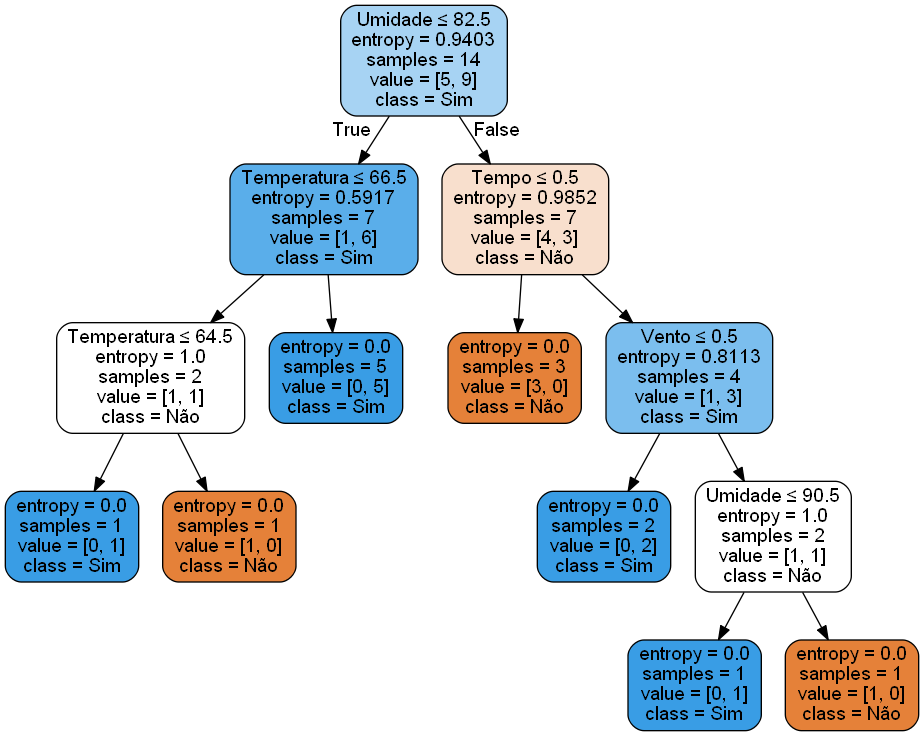

In [23]:
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['Tempo', 'Temperatura', 'Umidade', 'Vento'], 
                                class_names=['Não', 'Sim'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())